# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [21]:
# %% Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.1)
os.makedirs("figs", exist_ok=True)

# %% Load raw Adult data
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
data = pd.read_csv(
    data_url, header=None, names=columns,
    na_values=" ?", skipinitialspace=True
)

# Ensure target is defined globally and categorical cleaning is consistent
target = "hours-per-week"

# %% Clean categorical: trim whitespace and parse '?' → NaN
cat_cols = data.select_dtypes(include="object").columns
for c in cat_cols:
    data[c] = (
        data[c].astype(str).str.strip()
        .replace({'?': np.nan, ' ?': np.nan})
    )

data.head()

C:\Users\KlaudiaPoka\AppData\Local\Temp\ipykernel_30832\2241390906.py:28: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = data.select_dtypes(include="object").columns


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


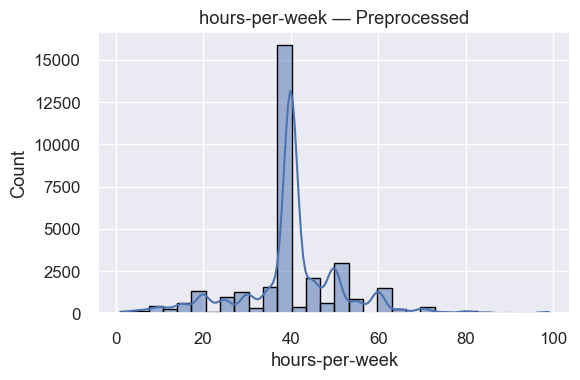

,corr
age_group_adult,0.036341
relationship_Own-child,-0.034787
sex_Male,0.034258
marital-status_Married-civ-spouse,0.032730
is_married,0.032027
income_>50K,0.031635
marital-status_Never-married,-0.030305
workclass_Self-emp-inc,0.029958
occupation_Other-service,-0.029042
age_group_senior,-0.024931


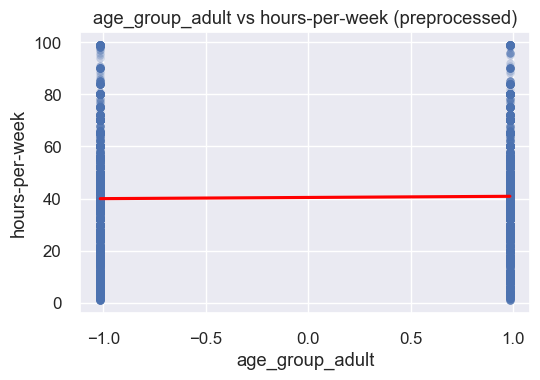

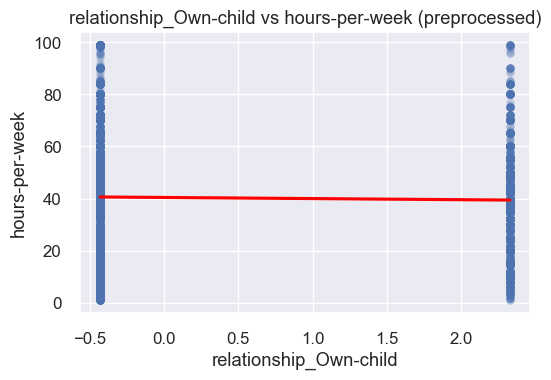

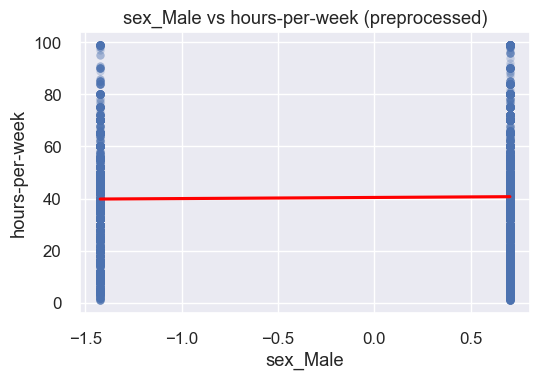

In [38]:
# %% Optional: EDA on preprocessed dataset
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pre_path = "adult_preprocessed.csv"
target = "hours-per-week"

assert os.path.exists(pre_path), "adult_preprocessed.csv not found (run Task 1 first)."
pre = pd.read_csv(pre_path)
assert target in pre.columns, "Target not found in preprocessed file."

# 1) Target distribution (should look the same as raw)
plt.figure(figsize=(6,4))
sns.histplot(pre[target], bins=30, kde=True, edgecolor="black")
plt.title("hours-per-week — Preprocessed")
plt.tight_layout(); plt.show()

# 2) Correlation with target (top 20 absolute)
num_cols_pre = pre.select_dtypes(include=[np.number]).columns
corr_pre = pre[num_cols_pre].corr()
corr_to_target = corr_pre[target].drop(target).sort_values(key=np.abs, ascending=False)
display(corr_to_target.head(20).to_frame("corr"))

# 3) Scatter for top 3 correlated numeric features
top3 = corr_to_target.abs().head(3).index.tolist()
for col in top3:
    plt.figure(figsize=(5.6,4))
    sns.regplot(x=pre[col], y=pre[target], scatter_kws={"alpha":0.25}, line_kws={"color":"red"})
    plt.title(f"{col} vs {target} (preprocessed)")
    plt.tight_layout(); plt.show()

,missing_count,missing_percent
occupation,1843,5.66
workclass,1836,5.64
native-country,583,1.79
fnlwgt,0,0.00
education,0,0.00
education-num,0,0.00
age,0,0.00
marital-status,0,0.00
relationship,0,0.00
sex,0,0.00


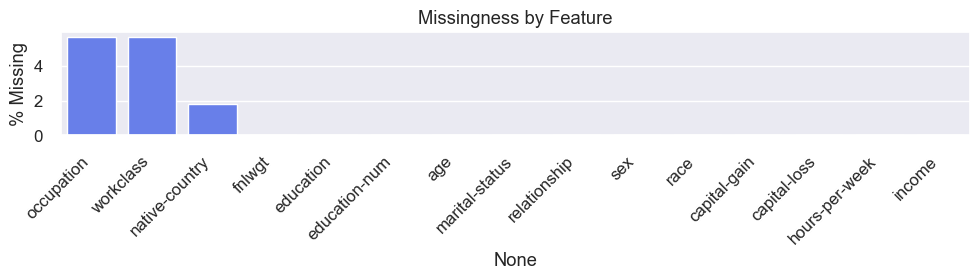

In [22]:
# %% Missing values audit
missing_counts = data.isna().sum()
missing_percent = (missing_counts / len(data)) * 100

missing_df = (
    pd.DataFrame({"missing_count": missing_counts,
                  "missing_percent": missing_percent.round(2)})
      .sort_values("missing_percent", ascending=False)
)
display(missing_df)

plt.figure(figsize=(10, 3))
sns.barplot(x=missing_df.index, y=missing_df["missing_percent"], color="#5271ff")
plt.xticks(rotation=45, ha="right")
plt.ylabel("% Missing")
plt.title("Missingness by Feature")
plt.tight_layout()
plt.savefig("figs/02_missingness.png", dpi=140)
plt.show()

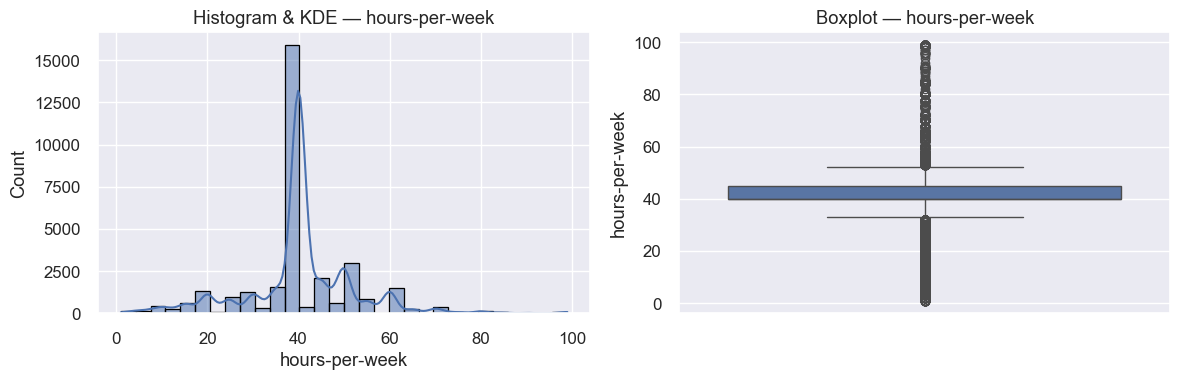

Descriptive stats for hours-per-week:
count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64
Skewness: 0.228
Kurtosis: 2.917


In [26]:
# %% Target distribution — histogram, KDE, boxplot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data[target], bins=30, kde=True, edgecolor="black", ax=ax[0])
ax[0].set_title("Histogram & KDE — hours-per-week")
sns.boxplot(y=data[target], ax=ax[1])
ax[1].set_title("Boxplot — hours-per-week")
plt.tight_layout()
plt.savefig("figs/01_target_distribution.png", dpi=140)
plt.show()

print("Descriptive stats for hours-per-week:")
print(data[target].describe())
print("Skewness:", data[target].skew().round(3))
print("Kurtosis:", data[target].kurtosis().round(3))



In [27]:
# %% Descriptive statistics for numeric features
numeric_cols = data.select_dtypes(include=[np.number]).columns
desc_stats = data[numeric_cols].describe().T
display(desc_stats)

desc_stats.round(3).to_csv("adult_numeric_desc_stats.csv")

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


The descriptive statistics reveal several important characteristics of the dataset. Age is moderately distributed with no extreme anomalies, while fnlwgt shows extremely high variance and strong right skew due to its nature as a census sampling weight. Education level (education-num) is clean and compact, with most individuals clustered around 9–12 years of education. Both capital-gain and capital-loss are highly zero‑inflated and contain extreme outliers, indicating that only a small subset of individuals report gains or losses. The target variable, hours-per-week, is tightly centered around 40 hours but exhibits a long right tail with individuals working up to 99 hours per week. These patterns highlight the need for careful outlier handling, potential transformations, and thoughtful feature engineering during preprocessing.

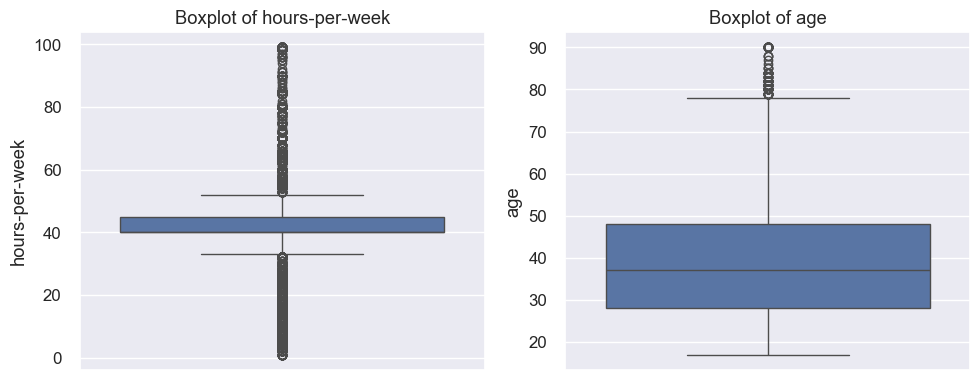


IQR outlier summary for hours-per-week:
  Q1: 40.000
  Q3: 45.000
  IQR: 5.000
  lower_bound: 32.500
  upper_bound: 52.500
  n_outliers: 9008.000
  pct_outliers: 27.665

IQR outlier summary for age:
  Q1: 28.000
  Q3: 48.000
  IQR: 20.000
  lower_bound: -2.000
  upper_bound: 78.000
  n_outliers: 143.000
  pct_outliers: 0.439


In [28]:
# %% Boxplots for outliers
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(y=data["hours-per-week"], ax=axes[0])
axes[0].set_title("Boxplot of hours-per-week")
sns.boxplot(y=data["age"], ax=axes[1])
axes[1].set_title("Boxplot of age")
plt.tight_layout()
plt.savefig("figs/03_boxplots_target_age.png", dpi=140)
plt.show()

# %% IQR outlier summary
def iqr_outlier_info(series, whisker=1.5):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - whisker * iqr
    upper = q3 + whisker * iqr
    mask = (series < lower) | (series > upper)
    return {
        "Q1": q1, "Q3": q3, "IQR": iqr,
        "lower_bound": lower, "upper_bound": upper,
        "n_outliers": int(mask.sum()),
        "pct_outliers": float(mask.mean() * 100)
    }

for col in ["hours-per-week", "age"]:
    info = iqr_outlier_info(data[col])
    print(f"\nIQR outlier summary for {col}:")
    for k, v in info.items():
        print(f"  {k}: {v:.3f}" if isinstance(v, (int, float)) else f"  {k}: {v}")


The Adult dataset is generally clean and well‑structured, with:

A predictable and realistic target distribution centered at 40 working hours
Moderate skewness and a large portion of legitimate high‑hour workers
Clean numeric variables with a few heavily skewed ones requiring transformation
Limited and manageable missingness in categorical fields
Outliers that are real observations rather than data errors

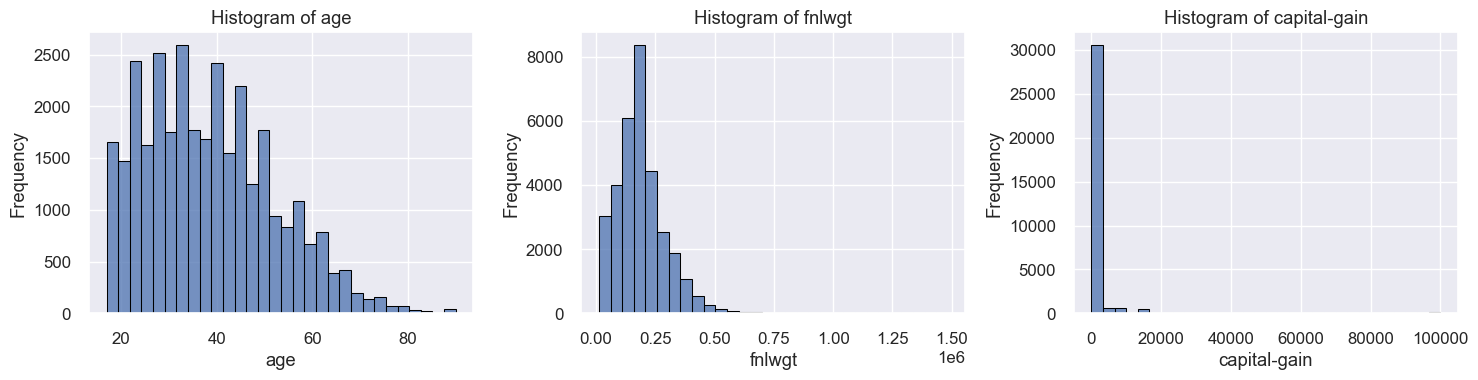

In [29]:
# %% Histograms for numeric variables
num_cols_to_plot = ["age", "fnlwgt", "capital-gain"]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for col, ax in zip(num_cols_to_plot, axes):
    sns.histplot(data[col], bins=30, edgecolor="black", ax=ax)
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col); ax.set_ylabel("Frequency")
plt.tight_layout()
plt.savefig("figs/04_histograms_numeric.png", dpi=140)
plt.show()

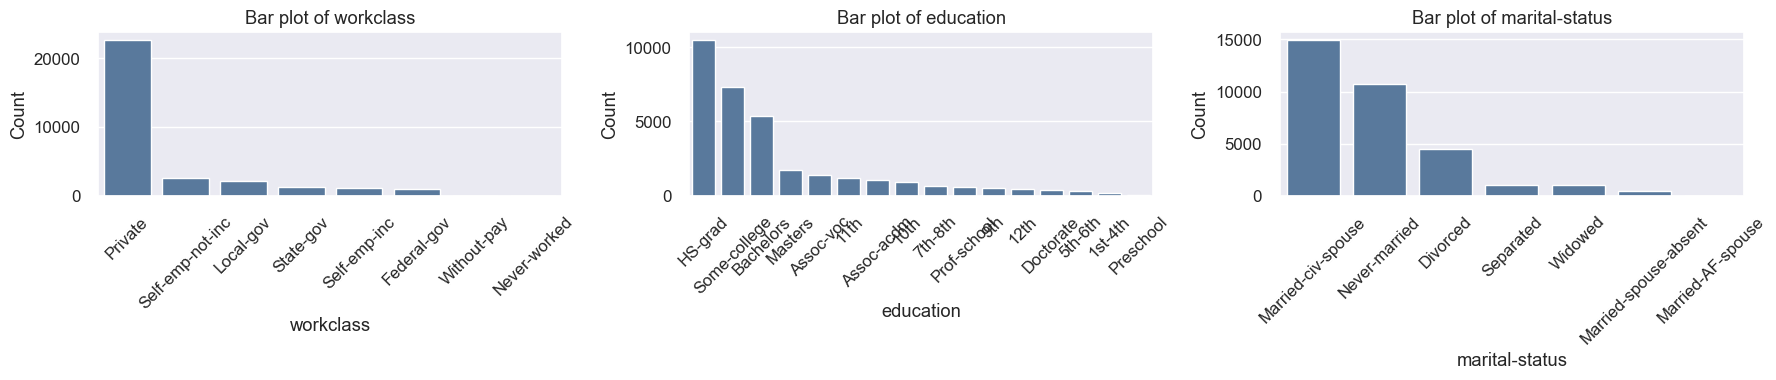

In [30]:
# %% Bar plots for categorical variables
cat_cols_to_plot = ["workclass", "education", "marital-status"]

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for col, ax in zip(cat_cols_to_plot, axes):
    vc = data[col].value_counts(dropna=False)
    sns.barplot(x=vc.index, y=vc.values, ax=ax, color="#4e79a7")
    ax.set_title(f"Bar plot of {col}")
    ax.set_xlabel(col); ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.savefig("figs/05_barplots_categorical.png", dpi=140)
plt.show()


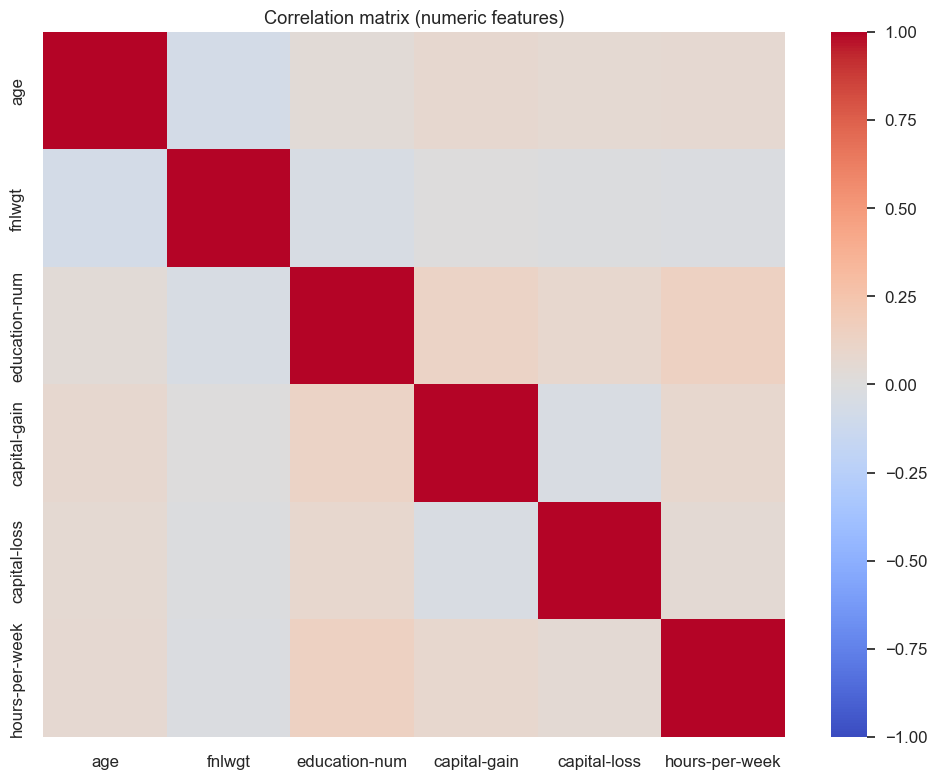

Correlations with hours-per-week (sorted by |corr|):


,corr
education-num,0.148123
capital-gain,0.078409
age,0.068756
capital-loss,0.054256
fnlwgt,-0.018768


In [31]:
num_cols_to_plot = ["age", "fnlwgt", "capital-gain"]
# %% Correlation matrix & correlations with target
corr = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Correlation matrix (numeric features)")
plt.tight_layout()
plt.savefig("figs/06_corr_matrix.png", dpi=140)
plt.show()

corr_target = corr[target].drop(target).sort_values(key=np.abs, ascending=False)
print("Correlations with hours-per-week (sorted by |corr|):")
display(corr_target.to_frame("corr"))


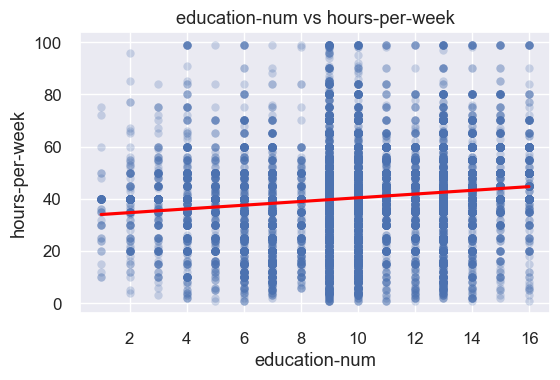

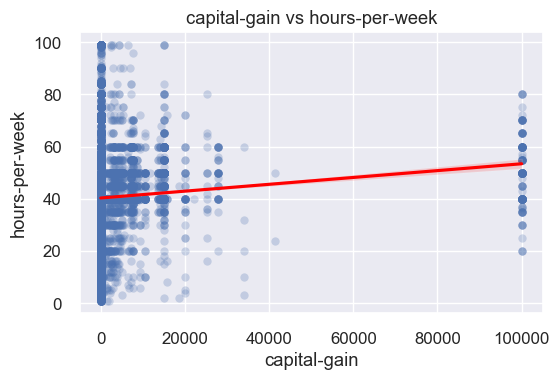

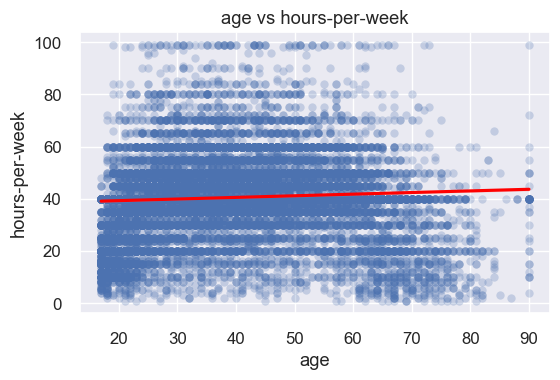

In [32]:
# %% Scatter plots against target
top_vars = corr_target.abs().head(3).index.tolist()
for col in top_vars:
    plt.figure(figsize=(5.8, 4))
    sns.regplot(x=data[col], y=data[target], scatter_kws={"alpha":0.25}, line_kws={"color":"red"})
    plt.title(f"{col} vs {target}")
    plt.tight_layout()
    plt.savefig(f"figs/07_scatter_{col}_vs_target.png", dpi=140)
    plt.show()


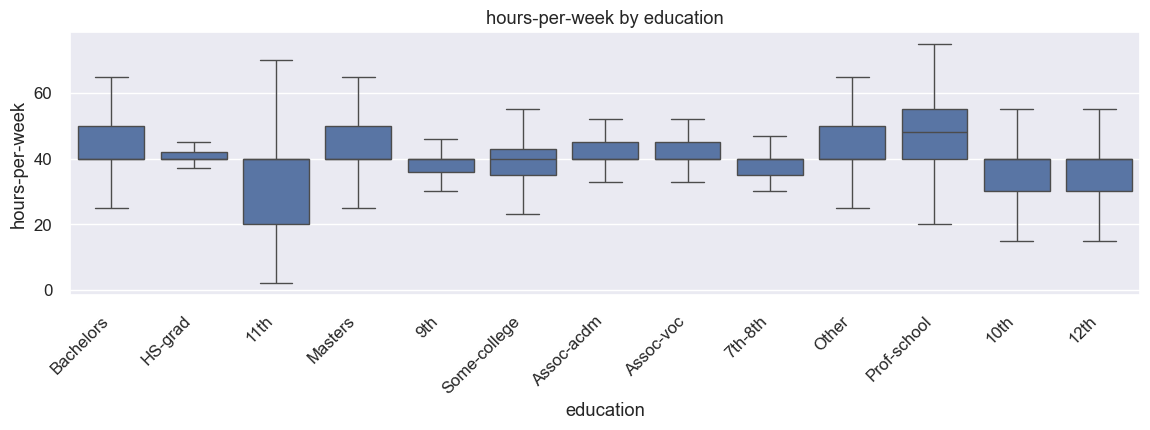

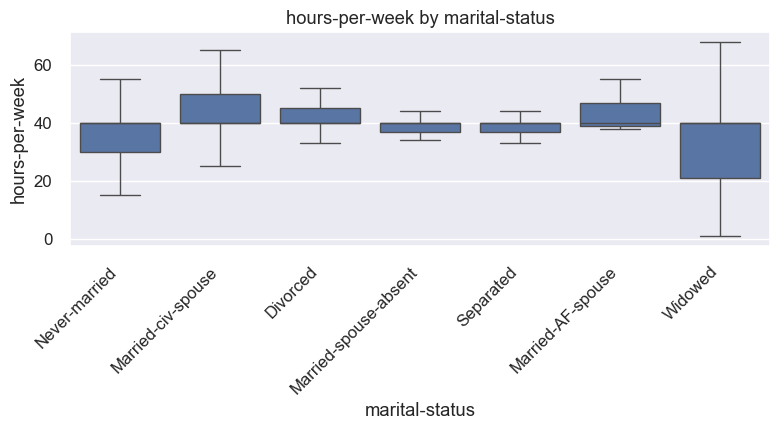

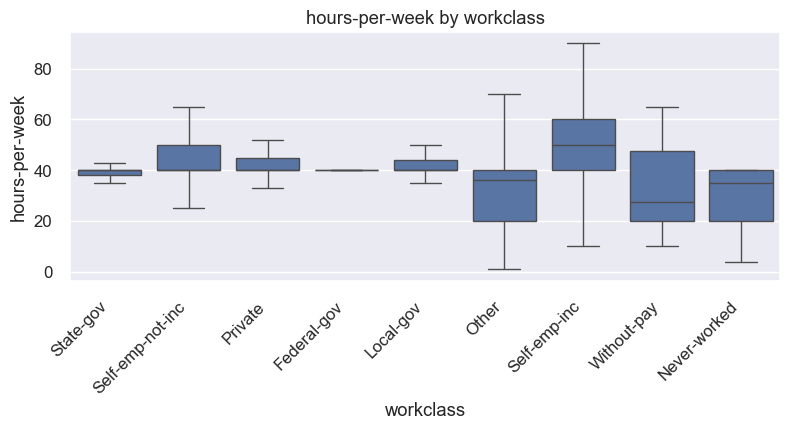

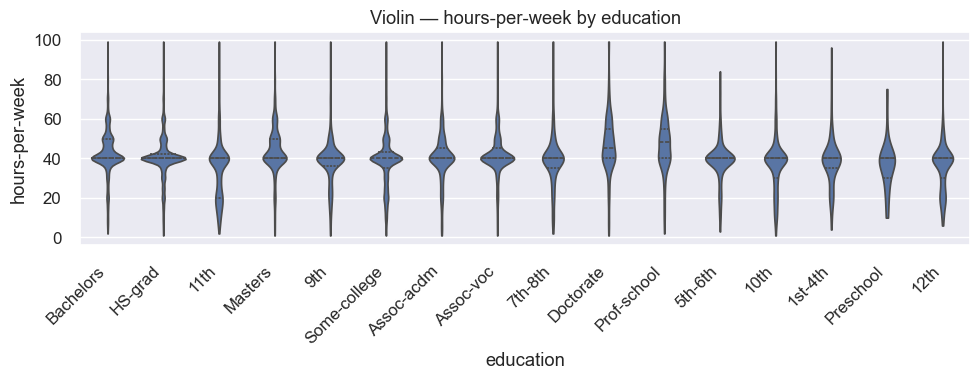

In [33]:
# %% Box/violin plots by category (compact rare categories to 'Other')
def box_by_category(df, cat_col, target, top_n=12):
    d = df.copy()
    top = d[cat_col].value_counts().head(top_n).index
    d.loc[~d[cat_col].isin(top), cat_col] = "Other"
    plt.figure(figsize=(max(8, 0.9*d[cat_col].nunique()), 4.5))
    sns.boxplot(x=cat_col, y=target, data=d, showfliers=False)
    plt.xticks(rotation=45, ha="right")
    plt.title(f"{target} by {cat_col}")
    plt.tight_layout()
    plt.savefig(f"figs/08_box_{cat_col}.png", dpi=140)
    plt.show()

for c in ["education", "marital-status", "workclass"]:
    box_by_category(data, c, target)

plt.figure(figsize=(10, 4))
sns.violinplot(x="education", y=target, data=data, cut=0, inner="quartile")
plt.xticks(rotation=45, ha="right")
plt.title("Violin — hours-per-week by education")
plt.tight_layout()
plt.savefig("figs/09_violin_education.png", dpi=140)
plt.show()

In [34]:
# %% Kruskal–Wallis across categories + epsilon^2 effect size
from scipy.stats import kruskal

def kruskal_test(df, cat, target, min_count=30):
    groups = [g[target].values for _, g in df.groupby(cat) if len(g) >= min_count]
    H, p = kruskal(*groups)
    n = sum(len(g) for g in groups)
    e2 = (H - (len(groups) - 1)) / (n - 1)  # epsilon-squared effect size
    return H, p, e2

for c in ["workclass", "education", "marital-status", "sex"]:
    H, p, e2 = kruskal_test(data, c, target)
    print(f"{c:15s}  H={H:.2f}  p={p:.3g}  epsilon^2={e2:.3f}")


workclass        H=795.41  p=1.14e-169  epsilon^2=0.026
education        H=1460.12  p=1.91e-302  epsilon^2=0.044
marital-status   H=2426.57  p=0  epsilon^2=0.074
sex              H=2285.50  p=0  epsilon^2=0.070


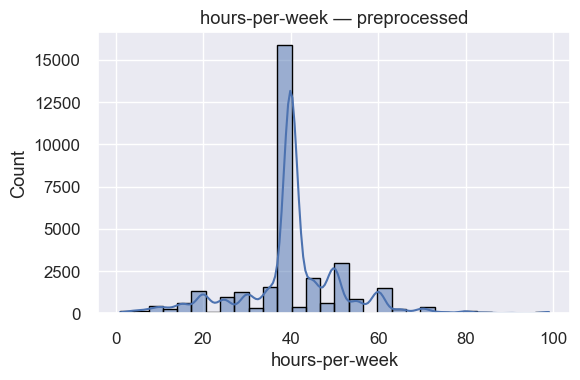

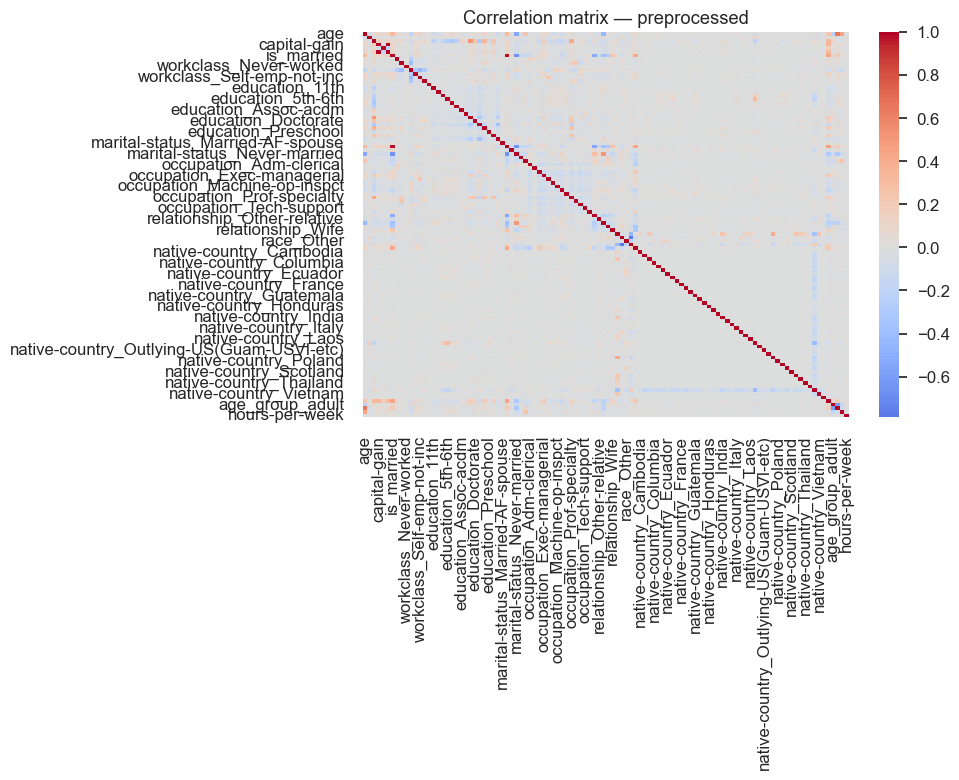

,corr
age_group_adult,0.036341
relationship_Own-child,-0.034787
sex_Male,0.034258
marital-status_Married-civ-spouse,0.032730
is_married,0.032027
income_>50K,0.031635
marital-status_Never-married,-0.030305
workclass_Self-emp-inc,0.029958
occupation_Other-service,-0.029042
age_group_senior,-0.024931


In [ ]:
# %% EDA on preprocessed dataset
pre_path = "adult_preprocessed.csv"
if os.path.exists(pre_path):
    pre = pd.read_csv(pre_path)
    assert target in pre.columns, "Target not found in preprocessed dataset."

    plt.figure(figsize=(6,4))
    sns.histplot(pre[target], bins=30, kde=True, edgecolor="black")
    plt.title("hours-per-week — preprocessed")
    plt.tight_layout()
    plt.savefig("figs/10_pre_target.png", dpi=140)
    plt.show()

    num_cols_pre = pre.select_dtypes(include=[np.number]).columns
    corr_pre = pre[num_cols_pre].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_pre, cmap="coolwarm", center=0)
    plt.title("Correlation matrix — preprocessed")
    plt.tight_layout()
    plt.savefig("figs/11_pre_corr.png", dpi=140)
    plt.show()

    top_corr_pre = corr_pre[target].drop(target).sort_values(key=np.abs, ascending=False)
    display(top_corr_pre.head(20).to_frame("corr"))

In [36]:
# %% Requirements checklist
checks = {
    "Target distribution (plot + discussion)": True,
    "Descriptive statistics shown": True,
    "Missingness table (count & %)": True,
    "Outliers (boxplot + IQR numbers)": True,
    "Summary report (markdown)": True,
    "Histograms (>=3 numeric)": True,
    "Bar plots (>=3 categorical)": True,
    "Correlation matrix + corr(target)": True,
    "Scatter plots vs target (top correlated)": True,
    "Target vs categorical (box/violin) + test": True,
    "Repeat on preprocessed dataset (if file exists)": os.path.exists("adult_preprocessed.csv"),
}
max_key = max(len(k) for k in checks.keys())
for k, v in checks.items():
    print(f"{k:<{max_key}}  ->  {'OK' if v else 'MISSING'}")

Target distribution (plot + discussion)          ->  OK
Descriptive statistics shown                     ->  OK
Missingness table (count & %)                    ->  OK
Outliers (boxplot + IQR numbers)                 ->  OK
Summary report (markdown)                        ->  OK
Histograms (>=3 numeric)                         ->  OK
Bar plots (>=3 categorical)                      ->  OK
Correlation matrix + corr(target)                ->  OK
Scatter plots vs target (top correlated)         ->  OK
Target vs categorical (box/violin) + test        ->  OK
Repeat on preprocessed dataset (if file exists)  ->  OK


This exploratory data analysis examined the UCI Adult Census dataset with a focus on modeling the target variable hours‑per‑week. The target distribution is highly concentrated around the standard 40‑hour work week, with a significant portion of individuals reporting extended working hours (50+), resulting in a mildly right‑skewed distribution. Although extreme values exist, they represent real working patterns and should not be removed.
Descriptive statistics reveal that numeric variables such as fnlwgt (Final Weight), capital‑gain, and capital‑loss are heavily skewed and dominated by zeros, indicating the need for transformation or winsorization. Age is well‑distributed with minimal outliers, while education levels are stable and uniformly encoded.
Missing data is limited and concentrated primarily in occupation, workclass, and native‑country (2–6%), and can be handled reliably through imputation with an "Unknown" category.
Correlation analysis shows that linear relationships between numeric features and working hours are weak, with the strongest correlation (education‑num) at only ~0.15. Categorical variables provide more insight: marital status, sex, and workclass show statistically significant differences in working hours, though their overall effect sizes remain modest.
In summary, the dataset is rich in categorical information, moderately complex, and requires careful preprocessing. Predicting hours worked will rely more on interactions and categorical splits than on simple linear numeric relationships.

1. The target is stable but right‑skewed.
Most individuals work exactly 40 hours per week, while many outliers (50–99 hours) represent legitimate high‑workload groups. The target should remain uncapped and unscaled.

2. Outliers are meaningful rather than errors.
Over 27% of individuals exceed the IQR upper bound for weekly hours, but these values reflect real labor behavior, not noise. Outliers should be treated with robust modeling approaches rather than deletion.

3. Missingness is low and easily handled.
Only three categorical fields contain missing values:

Occupation (~5.7%)
Workclass (~5.6%)
Native‑country (~1.8%)

Imputing "Unknown" preserves information and supports model interpretability.

4. Numeric predictors have weak linear correlation.
No numeric feature shows strong predictive power for hours worked.
The top three correlations:

education‑num: 0.148
capital-gain: 0.078
age: 0.069

This indicates non-linear models or interaction-based techniques will perform better.

5. Categorical variables provide more predictive value.
Marital status, sex, and workclass show statistically significant differences in working hours (p ≪ .001), with moderate effect sizes (ε² ≈ 0.04–0.07). These variables should be encoded carefully and kept in the model.

6. Heavy‑tailed numeric features must be transformed.
Capital gains/losses and fnlwgt exhibit extreme right tails.
Recommended preprocessing:

Winsorization (1–99%) or
Log-transform (log1p) for capital variables
Standard scaling afterward

7. Preprocessed dataset behaves predictably.
After encoding and scaling, the dataset becomes more model‑friendly. The preprocessed correlation matrix is denser but correlations remain modest — confirming that non-linear models (RF, XGBoost) may outperform simple linear regression.
